# Curso: Machine Learning para Pronóstico Hidrológico

<div style="text-align:center;">
    <img src="https://github.com/paulmunozpauta//Curso_ML_pronostico_hidrologico/blob/main/notebooks/static/imgs/Logo_course.png?raw=true" width="300">
    <p style="margin-top:10px;">
        Contacto: paul.andres.munoz@gmail.com
    </p>
    <p><a href="https://paulmunozpauta.github.io/paulmunozpauta/index.html" target="_blank">Website personal</a></p>
</div>




## ✅ Antes de comenzar: sigue estos 4 pasos para ejecutar el notebook en Google Colab


Paso 1. Clona el repositorio de GitHub con los notebooks y datos del curso.


In [1]:
!git clone -- https://github.com/paulmunozpauta/Curso_ML_pronostico_hidrologico.git

Cloning into 'Curso_ML_pronostico_hidrologico'...
remote: Enumerating objects: 528, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 528 (delta 38), reused 23 (delta 12), pack-reused 468 (from 2)
Receiving objects: 100% (528/528), 1.04 GiB | 20.86 MiB/s, done.
Resolving deltas: 100% (59/59), done.
Updating files: 100% (430/430), done.


Paso 2. Accede a la carpeta clonada.


In [11]:
ls

LICENSE  notebooks/  poetry.lock  Presentaciones/  pyproject.toml  README.md


In [10]:
%cd Curso_ML_pronostico_hidrologico

[Errno 2] No such file or directory: 'Curso_ML_pronostico_hidrologico'
/content/Curso_ML_pronostico_hidrologico


In [4]:
ls

LICENSE  notebooks/  poetry.lock  Presentaciones/  pyproject.toml  README.md


Paso 3. Configura el entorno para ejecutar el código del curso.


In [ ]:
# Desinstala NumPy y pandas preinstalados que causan conflicto con poetry
!pip uninstall -y numpy
# Instala las versiones que tu pyproject necesita para que poetry no falle al importar
!pip install numpy==1.24.4

In [13]:
# Install Poetry
!pip install poetry
# Disable virtual environment creation (needed for Colab)
!poetry config virtualenvs.create false

  Using cached poetry-2.1.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached cleo-2.1.0-py3-none-any.whl.metadata (12 kB)
  Using cached dulwich-0.22.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.9 kB)
  Using cached findpython-0.6.3-py3-none-any.whl.metadata (5.3 kB)
  Using cached installer-0.7.0-py3-none-any.whl.metadata (936 bytes)
  Using cached pbs_installer-2025.4.9-py3-none-any.whl.metadata (990 bytes)
  Using cached pkginfo-1.12.1.2-py3-none-any.whl.metadata (13 kB)
  Using cached poetry_core-2.1.2-py3-none-any.whl.metadata (3.5 kB)
  Using cached tomlkit-0.13.2-py3-none-any.whl.metadata (2.7 kB)
  Using cached trove_classifiers-2025.5.1.12-py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🔁 Si la sesión se reinicia, repite los pasos 2 y 3.
➡️ Si no, continúa con el paso 4.


Paso 4. Instala los paquetes necesarios para el curso.


In [14]:
!poetry lock


Skipping virtualenv creation, as specified in config file.
Resolving dependencies... (8.3s)

Writing lock file


In [15]:
!poetry install --no-root

Skipping virtualenv creation, as specified in config file.
Installing dependencies from lock file

Package operations: 30 installs, 64 updates, 0 removals

  - Downgrading attrs (25.3.0 -> 24.2.0): Pending...
  - Installing pyrsistent (0.19.3): Pending...
  - Updating traitlets (5.7.1 -> 5.9.0): Pending...
  - Installing pyrsistent (0.19.3): Pending...
  - Updating traitlets (5.7.1 -> 5.9.0): Pending...
  - Downgrading attrs (25.3.0 -> 24.2.0): Downloading... 0%
  - Installing pyrsistent (0.19.3): Pending...
  - Updating traitlets (5.7.1 -> 5.9.0): Pending...
  - Updating traitlets (5.7.1 -> 5.9.0): Pending...
  - Installing pyrsistent (0.19.3): Downloading... 0%
  - Updating traitlets (5.7.1 -> 5.9.0): Pending...
  - Updating traitlets (5.7.1 -> 5.9.0): Pending...
  - Installing pyrsistent (0.19.3): Downloading... 100%
  - Updating traitlets (5.7.1 -> 5.9.0): Pending...
  - Updating traitlets (5.7.1 -> 5.9.0): Pending...
  - Installing pyrsistent (0.19.3): Installing...
  - Updating t

🧪 Ahora sí, empezamos con la parte práctica del curso


# 🛰️ Parte 1: Adquisición y preprocesamiento de datos de precipitación satelital

En esta sesión aprenderemos a:
- Acceder y descargar datos de dos fuentes globales de precipitación satelital:
  * PERSIANN-CCS (Universidad de California)
  * IMERG-ER (NASA - misión GPM)
- Abrir, georreferenciar y visualizar datos de precipitación satelital para una región específica.

# 🧰 Software para acceder a repositorios gratuitos de datos satelitales

<div style="text-align:center;"><img style="width: 100%;" src="https://github.com/paulmunozpauta//Curso_ML_pronostico_hidrologico/blob/main/notebooks/static/imgs/FileZilla_download.png?raw=1"></div>

## 🔑 Iniciar FileZilla

<div style="text-align:center;"><img style="width: 100%;" src="https://github.com/paulmunozpauta//Curso_ML_pronostico_hidrologico/blob/main/notebooks/static/imgs/FileZilla.png?raw=1"></div>

# 🌐 Fuente de datos PERSIANN

<div style="text-align:center;"><img style="width: 100%;" src="https://github.com/paulmunozpauta//Curso_ML_pronostico_hidrologico/blob/main/notebooks/static/imgs/PERSIANN_head.png?raw=1"></div>

Website: http://chrs.web.uci.edu

Subproductos disponibles:
- PERSIANN
- PERSIANN-CCS
- PERSIANN-CDR
- PERSIANN-IDR

Nos enfocaremos en el subproducto con la resolución espacial/temporal más fina: **PERSIANN-CCS**.

¿Qué es PERSIANN-CCS?

PERSIANN-CCS utiliza imágenes satelitales para analizar las nubes y estimar la precipitación a nivel global. Fue desarrollado por la Universidad de California en Irvine.

El método de estimación de precipitación es muy detallado, analizando la altura de las nubes y su cobertura. A diferencia de otros métodos, puede identificar nubes individuales y proporcionar información específica sobre ellas.
Esto permite estimar con más precisión cuánta precipitación cae en diferentes regiones, en tiempo real y con posibilidad de descarga gratuita.

📝 En resumen:
- **Período de datos**: Desde 2003 hasta el presente
- **Cobertura**: Desde 60°S hasta 60°N
- **Resolución**: 0.04° x 0.04° (~4.4 x 4.4 km por píxel)
- **Disponibilidad temporal**: Cada 1h, 3h, 6h, diario, mensual y anual
- **Latencia**: Prácticamente en tiempo real (~2 hours)

## Connect to the PERSIANN Data Repository

Enter the following information:

- **Protocol**: FTP - File Transfer Protocol  
- **Host**: persiann.eng.uci.edu  
- **Logon Type**: Anonymous  

<div style="text-align:center;"><img style="width: 60%;" src="https://github.com/paulmunozpauta/Curso_ML_pronostico_hidrologico/blob/main/notebooks/static/imgs/FTP_PERSIANN.png?raw=1"></div>

Upon connecting, you will have remote access to the PERSIANN data folder.

<div style="text-align:center;"><img style="width: 100%;" src="https://github.com/paulmunozpauta/Curso_ML_pronostico_hidrologico/blob/main/notebooks/static/imgs/Filezilla_PERSIANN_CCS.png?raw=1"></div>

## Download Data from the PERSIANN-CCS Repository

Click derecho en la carpeta/archivo que queremos descargar en la carpeta local

<div style="text-align:center;"><img style="width: 100%;" src="https://github.com/paulmunozpauta//Curso_ML_pronostico_hidrologico/blob/main/notebooks/static/imgs/Filezilla_local.png?raw=1"></div>

We now have PERSIANN-CCS precipitation files.

## Visualize Data on the Platform

Access the data visualization platform using the following link:

[https://chrsdata.eng.uci.edu](https://chrsdata.eng.uci.edu)

## Open a PERSIANN-CCS file

Import the necessary libraries:

In [16]:
import gzip
import descartes
import pickle
import numpy as np
from shapely.geometry import mapping
import geopandas as gpd
import os
import glob
import rasterio
import rioxarray
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime
import calendar
import pandas as pd
from scipy import signal
import pickle
import h5py
def JulianDate_to_MMDDYYY(y,jd):
    month = 1
    day = 0
    while jd - calendar.monthrange(y,month)[1] > 0 and month <= 12:
        jd = jd - calendar.monthrange(y,month)[1]
        month = month + 1
    return jd, month

def getLine(data, line_no):
    n = 0
    lastPos = -1
    for i in range(0, len(data) - 1):
        if data[i] == "\n":
            n = n + 1
            if n == line_no:
                return data[lastPos + 1:i]
            else:
                lastPos = i;

    if(n == line_no - 1):
        return data[lastPos + 1:]
    return ""

Define the project folder where PERSIANN-CCS data is saved

In [17]:
folder = os.getcwd()
folder

'/content/Curso_ML_pronostico_hidrologico'

In [18]:
folder_files= folder+'/notebooks/data/PERSIANN-CCS/Hourly/Global/2023/'
folder_files

'/content/Curso_ML_pronostico_hidrologico/notebooks/data/PERSIANN-CCS/Hourly/Global/2023/'

Define the name of a file for reading

In [19]:
item=folder_files+'rgccs1h2301500.bin.gz'
item

'/content/Curso_ML_pronostico_hidrologico/notebooks/data/PERSIANN-CCS/Hourly/Global/2023/rgccs1h2301500.bin.gz'

'rgccs1h2301500.bin.gz' is a binary zipped file whose name coding indicates:
- 1h: hourly data
- 23: year 2023
- 015: day 15 of the year
- 00: data corresponding yo 00 hours (24-hour format)

Reading the file

In [20]:
f = gzip.GzipFile(item)
file_content = f.read()
data = np.frombuffer(file_content, dtype=np.dtype('>h')).astype(float)
data = data.reshape((3000,9000))
data_1 = data[:,4500:]
data_2 = data[:,:4500]
data = np.hstack((data_1,data_2))
data= data/100
data[data < 0] = np.nan
data = np.flipud(data)

In [21]:
data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

Georeferencing the data matrix

In [22]:
lon=np.arange(-180,180,0.04)
lat=np.arange(60,-60,-0.04)
data = xr.DataArray(data=data, dims=["lat", "lon"], coords=[lat,lon])
data.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
data

<xarray.DataArray (lat: 3000, lon: 9000)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 60.0 59.96 59.92 59.88 ... -59.88 -59.92 -59.96
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0

Plot the georeferenced global precipitation file

<ipython-input-23-2496fbf62134>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


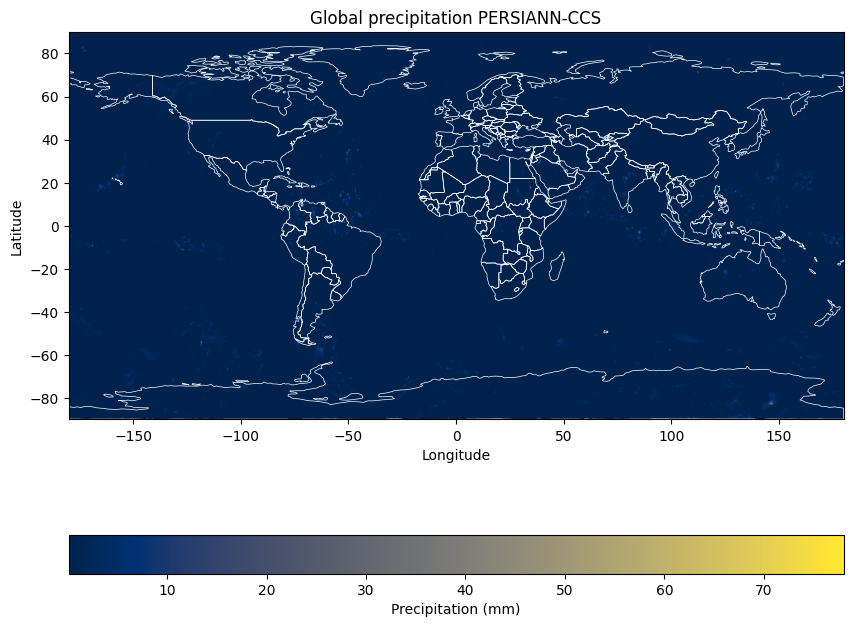

In [23]:
# Load the world map correctly
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
# Plot world boundaries
world.boundary.plot(ax=ax, color='white', linewidth=0.5)
# Plot the data
max_val = data.max()
im = ax.imshow(data, cmap='cividis', vmin=0.1, vmax=int(max_val), extent=[-180, 180, -90, 90])
# Set aspect ratio
ax.set_aspect('equal')
# Add title and labels
plt.title("Global precipitation PERSIANN-CCS")
cbar = plt.colorbar(im, ax=ax, orientation='horizontal')
cbar.set_label('Precipitation (mm)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# Show the plot
plt.show()

Extract basic statistics from the data:

In [24]:
print('Maximum precipitation = ',data.max().values,'mm')
print('Average precipitation = ',data.mean().values,'mm')
print('Minimum precipitation = ',data.min().values,'mm')

Maximum precipitation =  78.73 mm
Average precipitation =  0.11433396293872454 mm
Minimum precipitation =  0.0 mm


Load the shapefile of a hydrological system:
- For example, a mountain catchment in Ecuador, South America

In [25]:
data.rio.write_crs("epsg:4326", inplace=True)
catchment_shp_1 = gpd.read_file(folder+'/notebooks/shapefiles/Catchment_SA.shp')

Display the catchment

<Axes: >

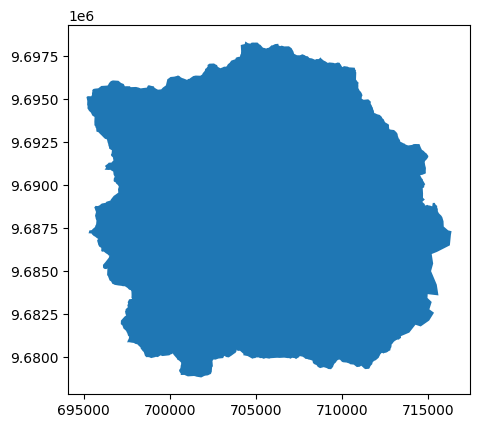

In [26]:
catchment_shp_1.plot()

In [27]:
import folium
# Convert to WGS 84 (if needed)
if catchment_shp_1.crs != "EPSG:4326":
    catchment_shp_1 = catchment_shp_1.to_crs(epsg=4326)
centroid = catchment_shp_1.geometry.centroid.iloc[0]
map_center = [centroid.y, centroid.x]
# Create a folium map centered on the catchment area
m = folium.Map(location=map_center, zoom_start=10)
# Add the catchment boundaries to the map
folium.GeoJson(catchment_shp_1, name="Catchment").add_to(m)
# Display the map
m

<ipython-input-27-e6f230e45a15>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = catchment_shp_1.geometry.centroid.iloc[0]


Area of the catchment (polygon)

In [ ]:
catchment_shp_1 = catchment_shp_1.to_crs(epsg=32717)
catchment_shp_1["Area_m2"] = catchment_shp_1.geometry.area
catchment_shp_1["Area_km2"] = catchment_shp_1["Area_m2"] / 1e6
catchment_shp_1["Area_km2"]

Clip the global precipitation data to the catchment

In [ ]:
data_catchment_1 = data.rio.clip(catchment_shp_1.geometry.apply(mapping),catchment_shp_1.crs,all_touched=True)

Mostrar la precipitación de la cuenca del río Tomebamba

In [ ]:
fig = plt.subplots(figsize=(8,8))
data_catchment_1.plot(cmap='Blues')
plt.title("PERSIANN-CCS precipitation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Basic precipitation statistics for the catchment

In [ ]:
print('Maximum precipitation = ',data_catchment_1.max().values,'mm')
print('Average precipitation= ',data_catchment_1.mean().values,'mm')
print('Minimum precipitation = ',data_catchment_1.min().values,'mm')

Now, for another catchment
- Coastal catchment in Ecuador

In [ ]:
catchment_shp_2 = gpd.read_file(folder+'/notebooks/shapefiles/Coastal_catchment.geojson')
catchment_shp_2.plot()

Let's take a look at the catchment in South America

In [ ]:
# Convert to WGS 84 (if needed)
if catchment_shp_2.crs != "EPSG:4326":
    catchment_shp_2 = catchment_shp_2.to_crs(epsg=4326)
centroid = catchment_shp_2.geometry.centroid.iloc[0]
map_center = [centroid.y, centroid.x]
# Create a folium map centered on the catchment area
m = folium.Map(location=map_center, zoom_start=10)
# Add the catchment boundaries to the map
folium.GeoJson(catchment_shp_2, name="Catchment").add_to(m)
# Display the map
m

Area of the catchment (polygon)

In [ ]:
# Convert to the correct UTM Zone (update based on location), reprojection for accurate calculations
catchment_shp_2 = catchment_shp_2.to_crs(epsg=32717)  # UTM Zone 17S (Western Ecuador)
catchment_shp_2["Area_m2"] = catchment_shp_2.geometry.area
catchment_shp_2["Area_km2"] = catchment_shp_2["Area_m2"] / 1e6
catchment_shp_2["Area_km2"]

Clip the global precipitation data to the coastal catchment

In [ ]:
data_catchment_2 = data.rio.clip(catchment_shp_2.geometry.apply(mapping),catchment_shp_2.crs,all_touched=True)

Mostrar la precipitación en la cuenca

In [ ]:
fig = plt.subplots(figsize=(8,8))
data_catchment_2.plot(cmap='Blues')
plt.title("PERSIANN-CCS precipitation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Basic precipitation statistics for the coastal catchment

In [ ]:
print('Maximum precipitation = ',data_catchment_2.max().values,'mm')
print('Average precipitation= ',data_catchment_2.mean().values,'mm')
print('Minimum precipitation = ',data_catchment_2.min().values,'mm')

**Now read all the downloaded precipitation files in the folder**

Create a list for the downloaded files

In [ ]:
folder_files
file_extension = "*.bin.gz"
list_of_Files = glob.glob(os.path.join(folder_files, file_extension))
list_of_Files = [file_name for file_name in list_of_Files if not file_name.startswith('.DS_Store')]
list_of_Files.sort()

Display the list

In [ ]:
list_of_Files[:10]

Read the files, one by one, and calculate the accumulated precipitation. Data  folder contains the first 15 days of January 2023

In [ ]:
data_sum = xr.DataArray(data=np.empty((3000, 9000)), dims=["lat", "lon"])
for index, item in enumerate(list_of_Files):
    print(index+1, 'out of', len(list_of_Files))
    f=gzip.GzipFile(item)
    try:
        file_content = f.read()
    except (IOError, EOFError) as e:
        continue
    data = np.frombuffer(file_content, dtype=np.dtype('>h')).astype(float)
    data = data.reshape((3000,9000))
    data_1 = data[:,4500:]
    data_2 = data[:,:4500]
    data = np.hstack((data_1,data_2))
    data= data/100
    data[data < 0] = np.nan
    data = np.flipud(data)
    data = xr.DataArray(data=data, dims=["lat", "lon"], coords=[lat,lon])
    data_sum+=data

In [ ]:
data_sum

- Georeference the data
- Clip the accumulated satellite precipitation to the catchment shapefile (Mountain catchment)

In [ ]:
data_sum.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
data_sum.rio.write_crs("epsg:4326", inplace=True)
data_catchment_1 = data_sum.rio.clip(catchment_shp_1.geometry.apply(mapping),catchment_shp_1.crs,all_touched=True)

- Plot the data.
- Display basic statistics.

In [ ]:
fig = plt.subplots(figsize=(8,8))
plt.imshow(data_catchment_1,cmap='cividis',vmin=0.1,vmax=150)
plt.title("PERSIANN-CCS precipitation")
plt.colorbar(label='Precipitation (mm)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
print('Maximum precipitación = ',data_catchment_1.max().values,'mm')
print('Average precipitación = ',data_catchment_1.mean().values,'mm')
print('Minimum precipitación = ',data_catchment_1.min().values,'mm')

Now for the coastal catchment

In [ ]:
data_catchment_2 = data_sum.rio.clip(catchment_shp_2.geometry.apply(mapping),catchment_shp_2.crs,all_touched=True)
fig = plt.subplots(figsize=(8,8))
plt.imshow(data_catchment_2,cmap='cividis',vmin=0.1,vmax=150)
plt.title("PERSIANN-CCS precipitation")
plt.colorbar(label='Precipitation (mm)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
print('Maximum precipitación = ',np.round(data_catchment_2.max().values,2),'mm')
print('Average precipitación = ',np.round(data_catchment_2.mean().values,2),'mm')
print('Minimum precipitación = ',np.round(data_catchment_2.min().values,2),'mm')

Generate a dataFrame with precipitation time series (for each pixel):

- Example: In the mountain catchment, time series for January 1, 2023.

In [ ]:
dataset_list = []  # Store data frames for concatenation later
for index, item in enumerate(list_of_Files[:24]):
    print(index + 1, 'out of', len(list_of_Files[:24]))

    try:
        with gzip.GzipFile(item, 'rb') as f:
            file_content = f.read()
    except (IOError, EOFError):
        continue  # Skip to next file if there's an error

    data = np.frombuffer(file_content, dtype=np.dtype('>h')).astype(float)  # Convert to float
    data = data.reshape((3000, 9000))
    # Splitting and rearranging data
    data_1 = data[:, 4500:]
    data_2 = data[:, :4500]
    data = np.hstack((data_1, data_2))
    data = data / 100  # Scale values
    data[data < 0] = np.nan  # Replace negative values with NaN
    data = np.flipud(data)  # Flip vertically
    # Convert to xarray DataArray
    data = xr.DataArray(data=data, dims=["lat", "lon"], coords=[lat, lon])
    data.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
    data.rio.write_crs("epsg:4326", inplace=True)
    # Clip the data using the catchment shape
    data = data.rio.clip(catchment_shp_1.geometry.apply(mapping), catchment_shp_1.crs, all_touched=True)
    data = data.values.flatten()
    # Extract date from filename
    date_att = str(item)
    year = int('20' + str(date_att[-14:-12]))
    julian_day = int(str(date_att[-12:-9]))
    day, month = JulianDate_to_MMDDYYY(year, julian_day)
    hour = int(str(date_att[-9:-7]))
    date = datetime.datetime(year, month, day, hour, 0, 0)
    # Convert data to DataFrame
    data = pd.DataFrame(data)
    data = data.dropna()
    data = data.T
    data.index = pd.DatetimeIndex([date])  # Set datetime index
    dataset_list.append(data)  # Append to the list
# Concatenate all DataFrames
if dataset_list:
    dataset = pd.concat(dataset_list)

- Preprocess the information
- Remove duplicate data

In [ ]:
dataset.shape

In [ ]:
dataset = dataset.sort_index()
dataset = dataset[~dataset.index.duplicated(keep='first')]
dataset

Export this information in **CSV** format

In [ ]:
dataset.to_csv(folder_files+"PERSIANN-CCS_UTC_Catchment_1.csv", index=True)

Plot the extracted satellite precipitation

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
dataset.plot(kind='bar', ax=ax)
ax.legend(title='Legend Title')
plt.ylabel('Satellite precipitation (mm)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), ncol=6)
plt.show()

Calculate and plot the accumulated precipitation

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
dataset.cumsum().plot(ax=ax)
ax.legend(title='Legend Title')
plt.ylabel('Accumulated precipitation (mm)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=6)
plt.show()

# IMERG satellite precipitation

Website: [https://gpm.nasa.gov/data/imerg](https://gpm.nasa.gov/data/imerg)

## Available Subproducts:
- **Early Run**
- **Late Run**
- **Final Run**

We will focus on the subproduct with the finest spatial/temporal resolution, **IMERG-Early Run**.

## Prior registration to download IMERG data

To access and download IMERG data, prior registration is required. Follow these steps:

https://registration.pps.eosdis.nasa.gov/registration/newContact.html

<div style="text-align:center;"><img style="width: 100%;" src="https://github.com/paulmunozpauta/Curso_ML_pronostico_hidrologico/blob/main/notebooks/static/imgs/IMERG_registration.png?raw=1"></div>


Once registered, confirm your account via the email verification link.  

## Connect to the IMERG data repository

Enter the following information to connect to the IMERG FTP server:

- **Protocol:** FTP - File Transfer Protocol  
- **Host:** `jsimpsonftps.pps.eosdis.nasa.gov`  
- **Logon Type:** Normal  
  - Enter your **username** and **password** from your NASA Earthdata account.

Once connected, navigate to the desired directory to access IMERG data.

<div style="text-align:center;"><img style="width: 100%;" src="https://github.com/paulmunozpauta/Curso_ML_pronostico_hidrologico/blob/main/notebooks/static/imgs/IMERG_FTP.png?raw=1"></div>

Upon connecting, you gain remote access to the IMERG data folder.  

From here, you can navigate through the directories to locate and download the desired datasets.

<div style="text-align:center;"><img style="width: 100%;" src="https://github.com/paulmunozpauta//Curso_ML_pronostico_hidrologico/blob/main/notebooks/static/imgs/IMERG_server.png?raw=1"></div>

## Download data from the IMERG-Early Run repository


Right-click on the folder/file you want to download and select **"Download"** to save it to your local directory.  

## Open an IMERG precipitation file

Define IMERG-ER data folder

In [ ]:
folder = os.getcwd()
folder_files= folder+'/notebooks/data/IMERG-ER/Hourly/Global/202301/'
folder_files

Create a list of precipitation files. Data contains satellite precipittaion for January 31, 2023.

In [ ]:
list_of_Files = glob.glob(folder_files + '/*H5')
list_of_Files.sort()

Display the list

In [ ]:
list_of_Files

Define the path of a file for reading.

In [ ]:
item=folder_files+'3B-HHR-E.MS.MRG.3IMERG.20230131-S000000-E002959.0000.V06C.RT-H5'
item

The name coding '3B-HHR-E.MS.MRG.3IMERG.20230131-S000000-E002959.0000.V06C.RT-H5' indicates:
- 3B-HHR-E.MS.MRG.3IMERG: product information
- 20230131: YearMonthDay
- S000000: start of scan (hhmmss)
- E002959: end of scan (hhmmss)

Open a single precipitation file.

In [ ]:
data = h5py.File( item, 'r' )
precip = data['/Grid/precipitationCal'][:]
precip = np.flip( precip[0,:,:].transpose(), axis=0 )

Display the read data matrix.

In [ ]:
precip

Basic statistics

In [ ]:
print('Maximum precipitation = ',precip.max(),'mm')
print('Average precipitation = ',precip.mean(),'mm')
print('Minimum precipitation = ',precip.min(),'mm')

Display the global precipitation information.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(precip, vmin=-1, vmax=80, extent=[-180, 180, -90, 90])
cbar = plt.colorbar(im, orientation='horizontal')
cbar.set_label('millimeters/hour')
for lon in np.arange(-90, 90+1, 90):
    plt.plot((lon, lon), (-90, +90), color="black", linewidth=1)
for lat in np.arange(-60, 60+1, 30):
    plt.plot((-180, +180), (lat, lat), color="black", linewidth=1)
plt.show()

Georeference and clip the global precipitation data to the mountain catchment

In [ ]:
precip

In [ ]:
lat = data['/Grid/lat'][:]
lon = data['/Grid/lon'][:]
catchment_shp_1 = gpd.read_file(folder+'/notebooks/shapefiles/Catchment_SA.shp')
data = xr.DataArray(data=precip, dims=["lat", "lon"], coords=[lat,lon])
data.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
data.rio.write_crs("epsg:4326", inplace=True)
data_catchment_1= data.rio.clip(catchment_shp_1.geometry.apply(mapping),catchment_shp_1.crs,all_touched=True)

Plot the precipitation for the mountain catchment

In [ ]:
fig = plt.subplots(figsize=(8,8))
data_catchment_1.plot(cmap='cividis',vmin=0,vmax=0.01)
plt.title("IMERG-ER precipitation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Basic statistics

In [ ]:
print('Maximum precipitation = ', np.round(data_catchment_1.max().values,2),'mm')
print('Average precipitation = ', np.round(data_catchment_1.mean().values,2),'mm')
print('Minimum precipitation = ', np.round(data_catchment_1.min().values,2),'mm')

Plot the precipitation for the coastal catchment

In [ ]:
catchment_shp_2 = gpd.read_file(folder+'/notebooks/shapefiles/Coastal_catchment.geojson')
data_catchment_2 = data.rio.clip(catchment_shp_2.geometry.apply(mapping),catchment_shp_2.crs,all_touched=True)
fig = plt.subplots(figsize=(8,8))
data_catchment_2.plot(cmap='cividis',vmin=0,vmax=5)
plt.title("Precipitación Global IMERG-ER")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
print('Maximum precipitation = ', np.round(data_catchment_2.max().values,2),'mm')
print('Average precipitation = ', np.round(data_catchment_2.mean().values,2),'mm')
print('Minimum precipitation = ', np.round(data_catchment_2.min().values,2),'mm')

Read and process all IMERG-ER files. in the folder

Display the list

In [ ]:
list_of_Files

Accumulate precipitation

In [ ]:
data_sum = xr.DataArray(data=np.empty((1800, 3600)), dims=["lat", "lon"])
for index, item in enumerate(list_of_Files):
    print(index+1, 'out of', len(list_of_Files))
    try:
        data = h5py.File(item, 'r')
        precip = data['/Grid/precipitationCal'][:]
        precip[precip < 0] = np.nan
        precip = np.flip(precip[0,:,:].transpose(), axis=0)
        theLats = data['Grid/lat'][:]
        theLons = data['Grid/lon'][:]
        x, y = np.meshgrid(theLons, theLats)

        precip = xr.DataArray(precip, dims=('lat', 'lon'), coords={'lat' : theLats, 'lon' : theLons})

        data_sum += precip

        data.close()

    except (IOError, EOFError) as e:
        continue

Plot the accumulated precipitation information for January 31, 2023.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(data_sum, vmin=-1, vmax=1400, extent=[-180, 180, -90, 90])
cbar = plt.colorbar(im, orientation='horizontal')
cbar.set_label('millimeters/hour')

for lon in np.arange(-90, 90+1, 90):
    plt.plot((lon, lon), (-90, +90), color="black", linewidth=1)
for lat in np.arange(-60, 60+1, 30):
    plt.plot((-180, +180), (lat, lat), color="black", linewidth=1)

plt.show()

Clip that information to the mountain catchment

In [ ]:
data_sum.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
data_sum.rio.write_crs("epsg:4326", inplace=True)
data_sum_catchment_1= data_sum.rio.clip(catchment_shp_1.geometry.apply(mapping),catchment_shp_1.crs,all_touched=True)
data_sum_catchment_1

In [ ]:
fig = plt.subplots(figsize=(8,8))
data_sum_catchment_1.plot(cmap='cividis',vmin=0,vmax=16)
plt.title("IMERG-ER precipitation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
print('Maximum precipitación = ', np.round(data_sum_catchment_1.max().values,2),'mm')
print('Average precipitación = ', np.round(data_sum_catchment_1.mean().values,2),'mm')
print('Minimum precipitation = ', np.round(data_sum_catchment_1.min().values,2),'mm')

Now for the coastal catchment

In [ ]:
data_sum = xr.DataArray(data_sum, dims=('lat', 'lon'), coords={'lat' : theLats, 'lon' : theLons})
data_sum.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
data_sum.rio.write_crs("epsg:4326", inplace=True)
data_sum_catchment_2= data_sum.rio.clip(catchment_shp_2.geometry.apply(mapping),catchment_shp_2.crs,all_touched=True)
fig = plt.subplots(figsize=(8,8))
data_sum_catchment_2.plot(cmap='cividis',vmin=0,vmax=9)
plt.title("IMERG-ER precipitation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
print('Maximum precipitation = ', np.round(data_sum_catchment_2.max().values,2),'mm')
print('Average precipitation = ', np.round(data_sum_catchment_2.mean().values,2),'mm')
print('Minimum precipitation = ', np.round(data_sum_catchment_2.min().values,2),'mm')

Generate a database with precipitation time series (pixels) for the mountain catchment

In [ ]:
dataset_list = []  # List to store DataFrames for concatenation later
for index, item in enumerate(list_of_Files):
    print(index + 1, 'out of', len(list_of_Files))
    try:
        with h5py.File(item, 'r') as data:
            precip = data['/Grid/precipitationCal'][:]
    except (IOError, EOFError):
        continue  # Skip file if there's an error
    precip[precip < 0] = np.nan  # Replace negative values with NaN
    precip = np.flip(precip[0, :, :].transpose(), axis=0)  # Flip and transpose
    # Convert to xarray DataArray
    precip = xr.DataArray(precip, dims=('lat', 'lon'), coords={'lat': theLats, 'lon': theLons})
    precip.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
    precip.rio.write_crs("epsg:4326", inplace=True)
    # Clip the data using the catchment shape
    precip = precip.rio.clip(catchment_shp_1.geometry.apply(mapping), catchment_shp_1.crs, all_touched=True)
    precip = precip.values.flatten()
    # Extract date from filename
    year = int(item[-40:-36])
    month = int(item[-36:-34])
    day = int(item[-34:-32])
    hour = int(item[-22:-20])
    minute = int(item[-20:-18])
    date = datetime.datetime(year, month, day, hour, minute, 0)
    # Convert data to DataFrame
    data = pd.DataFrame(precip)
    data = data.dropna()
    data = data.T
    data.index = pd.DatetimeIndex([date])  # Set datetime index
    dataset_list.append(data)  # Append DataFrame to list
# Concatenate all DataFrames at the end
if dataset_list:
    dataset = pd.concat(dataset_list)
# Resample dataset, treating NaNs as zeros
dataset = dataset.resample('h', label='right', closed='right').sum().fillna(0)

Display dataframe

In [ ]:
dataset

Export the dataframe to csv

In [ ]:
dataset.to_csv(folder_files+"IMERG-ER_UTC_Catchment_1.csv", index=True)

Plot the precipitation time series.

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
dataset.plot(kind='bar', ax=ax)
ax.legend(title='Legend Title')
plt.ylabel('Precipitation_satellite (mm)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), ncol=7)
plt.show()

Plot the accumulated precipitation

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
dataset.cumsum().plot( ax=ax)
ax.legend(title='Legend Title')
plt.ylabel('Precipitation_satellite (mm)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), ncol=7)
plt.show()

Do the same for the coastal catchment

In [ ]:
dataset_list = []  # Store data frames for concatenation later
for index, item in enumerate(list_of_Files):
    print(index + 1, 'out of', len(list_of_Files))
    try:
        with h5py.File(item, 'r') as data:
            precip = data['/Grid/precipitationCal'][:]
    except (IOError, EOFError):
        continue  # Skip to next file if there's an error
    precip[precip < 0] = np.nan  # Replace negative values with NaN
    precip = np.flip(precip[0, :, :].transpose(), axis=0)  # Flip and transpose
    # Convert to xarray DataArray
    precip = xr.DataArray(precip, dims=('lat', 'lon'), coords={'lat': theLats, 'lon': theLons})
    precip.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
    precip.rio.write_crs("epsg:4326", inplace=True)
    # Clip the data using the catchment shape
    precip = precip.rio.clip(catchment_shp_2.geometry.apply(mapping), catchment_shp_2.crs, all_touched=True)
    precip = precip.values.flatten()
    # Extract date from filename
    year = int(item[-40:-36])
    month = int(item[-36:-34])
    day = int(item[-34:-32])
    hour = int(item[-22:-20])
    minute = int(item[-20:-18])
    date = datetime.datetime(year, month, day, hour, minute, 0)
    # Convert to DataFrame
    data = pd.DataFrame(precip)
    data = data.dropna()
    data = data.T
    data.index = pd.DatetimeIndex([date])  # Set datetime index
    dataset_list.append(data)  # Append to the list
# Concatenate all DataFrames
if dataset_list:
    dataset = pd.concat(dataset_list)
# Resample dataset
dataset = dataset.resample('h', label='right', closed='right').sum()

Display the dataframe

In [ ]:
dataset

Export the dataframe to csv

In [ ]:
dataset.to_csv(folder_files+"IMERG-ER_UTC_Catchment_2.csv", index=True)

Plot the precipitation time series.

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
dataset.plot(kind='bar', ax=ax)
ax.legend(title='Legend Title')
plt.ylabel('Precipitation_satellite (mm)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), ncol=9)
plt.show()

Plot the accumulated precipitation

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
dataset.cumsum().plot( ax=ax)
ax.legend(title='Legend Title')
plt.ylabel('Precipitation_satellite (mm)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), ncol=9)
plt.show()